# Workshop: Stochastic simulations in branching processes
## Solution to exercises

The exercises are available at the following address:
https://workshops.evolbio.mpg.de/event/53/

Day 1:
1. [Gillespie algorithm - a simple birth-death process](#section1)
2. [Several individual types - SIR model](#section2)
3. [Discrete time - Galton-Watson process](#section3)
4. [A birth-death process with switching environment](#section4)

Day 2:
1. [Single mutations](#section5)
2. [Decaying-dimerizing reaction set](#section6)
3. [Lewis thinning - periodical SIRS model](#section7)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Day 1

<a id='section1'></a>
## 1. Gillespie algorithm - a simple birth-death process

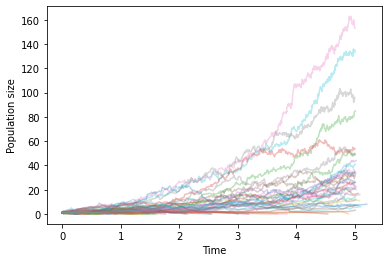

Probability of extinction = 0.69


In [2]:
# parameters
nb_sim = 100
time_max = 5
b = 1.5    # birth rate
d = 1   # death rate

# variable for the number of simulations that go to extinction
nb_ext = 0

for i in range(nb_sim):
    
    # initial conditions
    t = 0
    n = 1
    
    # save data
    data_t = [t]
    data_n = [n]
    
    while t < time_max:
        
        # update propensities
        a1 = b * n
        a2 = d * n
        
        # calculate total
        a0 = a1 + a2
        
        # estimate time next reaction
        tau = np.random.exponential(1 / a0)
        t = t + tau
        
        # choose next reaction
        p = np.random.uniform()
        if p < (a1 / a0):
            n = n + 1
        else:
            n = n - 1
        
        # save data
        data_t.append(t)
        data_n.append(n)
        
        # check for extinction
        if n == 0:
            nb_ext = nb_ext + 1
            break
            
    # plot
    plt.plot(data_t, data_n, alpha=0.3)
    
plt.xlabel('Time')
plt.ylabel('Population size')
plt.show()
print("Probability of extinction =", nb_ext / nb_sim)

<a id='section2'></a>
## 2. Several individual types - SIR model

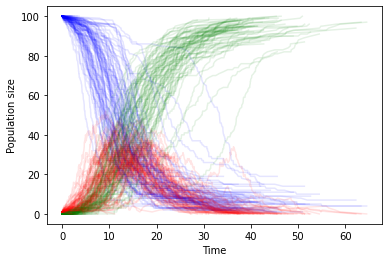

Average final epidemic size = 69.39


In [3]:
# parameters
nb_sim = 100
time_max = 100
beta = 0.006    # infection rate
r = 0.2   # recovery rate

# variable for the average final epidemic size
mean_final_R = 0

for i in range(nb_sim):
    
    # initial conditions
    t = 0
    S = 100
    I = 1
    R = 0
    
    # save data
    data_t = [t]
    data_S = [S]
    data_I = [I]
    data_R = [R]
    
    while t < time_max:
        
        # update propensities
        a1 = beta * S * I
        a2 = r * I
        
        # calculate total
        a0 = a1 + a2
        
        # estimate time next reaction
        tau = np.random.exponential(1 / a0)
        t = t + tau
        
        # choose next reaction
        p = np.random.uniform()
        if p < (a1 / a0):
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
        
        # save data
        data_t.append(t)
        data_S.append(S)
        data_I.append(I)
        data_R.append(R)
        
        # check for eradication of the infection
        if I == 0:
            break
    
    # average final epidemic size
    mean_final_R = mean_final_R + R
    
    # plot
    plt.plot(data_t, data_S, alpha=0.1, color="blue")
    plt.plot(data_t, data_I, alpha=0.1, color="red")
    plt.plot(data_t, data_R, alpha=0.1, color="green")
    
plt.xlabel('Time')
plt.ylabel('Population size')
plt.show()
print("Average final epidemic size =", mean_final_R / nb_sim)

<a id='section3'></a>
## 3. Discrete time - Galton-Watson process

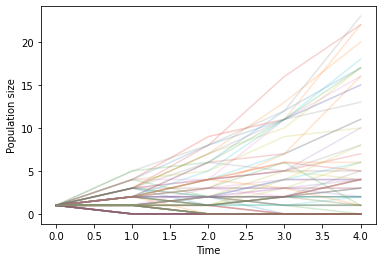

In [4]:
# parameters
nb_sim = 100
nb_gen = 5
R0 = 1.5

for i in range(nb_sim):
    
    # initial conditions
    n = 1
    
    # save data
    data_n = np.zeros(nb_gen)
    data_n[0] = n
    
    for j in range(1, nb_gen):
        
        # secondary cases
        nb_secondary_cases = np.random.poisson(R0, n)
        n = np.sum(nb_secondary_cases)
        
        # save data
        data_n[j] = n
        
    # plot
    plt.plot(range(nb_gen), data_n, alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Population size')
plt.show()

<a id='section4'></a>
## 4. A birth-death process with switching environment

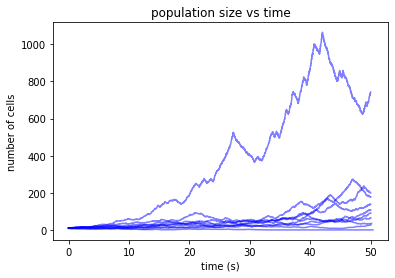

In [5]:
# parameters
b0 = 0.3
d0 = 0.1

b1 = 0.1
d1 = 0.2

l = 1 
lambdam = 1
lambdap = 1

n_runs = 10
tmax = 50


for i in range(n_runs):
    
    # initial conditions
    n = 10
    sigma = 1
    t = 0
    
    # save data
    data_time = [t]
    data_n = [n]
    data_sigma = [sigma]
    
    while t<=tmax:
        
        if sigma==0:
            
            #update propensities
            a1 = n * b0
            a2 = n * d0
            a3 = lambdap
            
            #time next reaction
            a0 = a1 + a2 + a3
            tau = np.random.exponential(1/a0)
            t = t + tau
            data_time.append(t)
            
            #next reaction
            
            r = np.random.uniform(0,1)
            
            if 0 <= r < a1/a0:
                n = n + 1
            elif a1/a0 <= r < (a1 + a2)/a0:
                n = n - 1
            else:
                sigma = 1
            
        elif sigma==1:
            a4 = n * b1
            a5 = n * d1
            a6 = lambdam
            
            #time next reaction
            a0 = a4 + a5 + a6
            tau = np.random.exponential(1/a0)
            t = t + tau
            data_time.append(t)
            
            #next reaction
            
            r = np.random.uniform(0,1)
            
            if 0 <= r < a4/a0:
                n = n + 1
            elif a4/a0 <= r < (a4 + a5)/a0:
                n = n - 1
            else:
                sigma = 0
        
        #save data
        
        data_n.append(n)
        data_sigma.append(sigma)
        
        
    #plot
    plt.plot(data_time, data_n, alpha=0.5, color = 'b')  
    
plt.title("population size vs time")
plt.xlabel("time (s)")
plt.ylabel("number of cells")
plt.show()

# Day 2

<a id='section5'></a>
## 1. Single mutations

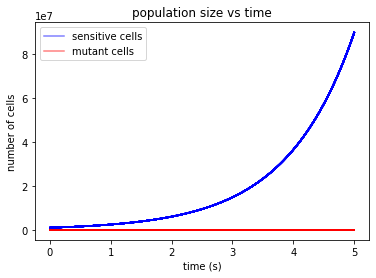

Average number of mutants A at time t=5: 181.99


In [6]:
# parameters
bS = 1.0
dS = 0.1
bA = 1.5
dA = 0.1
tmax = 5
muA = 10**-7
n_runs = 100
tau = 0.001

data_mutants_final = []

for i in range(n_runs):
    
    # initial conditions
    t = 0
    nS = 10**6
    nA = 0

    # save data
    data_nS = [nS]
    data_nA = [nA]
    data_time = [t]
    
    while t < tmax:
        
        # update propensities
        a1 = nS * bS * (1-muA)
        a2 = nS * dS
        a3 = nS * bS * muA
        a4 = nA * bA
        a5 = nA * dA

        # estimate number of times each reaction triggers
        K1 = np.random.poisson(a1*tau)
        K2 = np.random.poisson(a2*tau)
        K3 = np.random.poisson(a3*tau)
        K4 = np.random.poisson(a4*tau)
        K5 = np.random.poisson(a5*tau)

        # update system
        nS = nS + K1 - K2
        nA = nA + K3 + K4 - K5
        
        if (nS<0):
            nS = 0
        if (nA<0):
            nA = 0
        
        #update time
        t = t + tau
            
        # save data
        data_nS.append(nS)
        data_nA.append(nA)
        data_time.append(t)
            
    # save mutants at t=tmax
    data_mutants_final.append(nA)
        
    # plot
    plt.plot(data_time, data_nS, alpha=0.5, color = 'b')    
    plt.plot(data_time, data_nA, alpha=0.5, color = 'r')   
    
plt.title("population size vs time")
plt.xlabel("time (s)")
plt.ylabel("number of cells")
plt.legend(['sensitive cells', 'mutant cells'])
plt.show()

print("Average number of mutants A at time t=5:", np.mean(data_mutants_final))

<a id='section6'></a>
## 2. Decaying-dimerizing reaction set

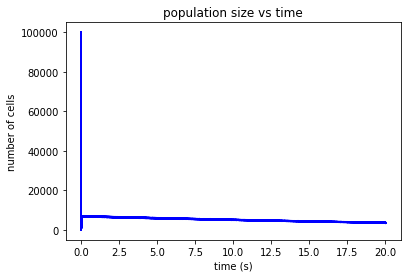

n1= 3606.75
n2= 55571.92
n3= 91347.11


In [7]:
c1 = 1.0
c2 = 0.002
c3 = 0.5
c4 = 0.04

n0 = 10**5

tau = 0.01
tmax = 20
n_runs = 100

data_n1_final = []
data_n2_final = []
data_n3_final = []

for i in range(n_runs):
    
    # initial conditions
    t = 0
    n1 = 10**5
    n2 = 0
    n3 = 0

    # save data
    data_n1 = [n1]
    data_n2 = [n2]
    data_n3 = [n3]
    data_time = [t]
    
    while t < tmax:
        
        # update propensities
        a1 = n1 * c1
        a2 = n1 * (n1-1)*c2
        a3 = n2 * c3
        a4 = n2 * c4

        # estimate number of times each reaction triggers
        K1 = np.random.poisson(a1*tau)
        K2 = np.random.poisson(a2*tau)
        K3 = np.random.poisson(a3*tau)
        K4 = np.random.poisson(a4*tau)

        # update system
        n1 = n1 - K1 - 2*K2 + 2*K3
        n2 = n2 + K2 - K3 - K4
        n3 = n3 + K4
        
        if (n1<0):
            n1 = 0
        if (n2<0):
            n2 = 0
        if (n3<0):
            n3 = 0
        
        #update time
        t = t + tau
            
        # save data
        data_n1.append(n1)
        data_n2.append(n2)
        data_n3.append(n3)
        data_time.append(t)
       
    data_n1_final.append(n1)
    data_n2_final.append(n2)
    data_n3_final.append(n3)
    
    # plot
    plt.plot(data_time, data_n1, alpha=0.5, color = 'b')     
    
plt.title("population size vs time")
plt.xlabel("time (s)")
plt.ylabel("number of cells")
plt.show()

print("n1=",np.mean(data_n1_final))
print("n2=",np.mean(data_n2_final))
print("n3=",np.mean(data_n3_final))

<a id='section7'></a>
## 3. Lewis thinning - periodical SIRS model

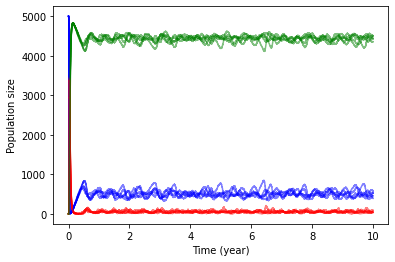

Average final number of infected I(t = 10) conditioned on non-extinction: 56.0


In [9]:
# parameters
nb_sim = 10
time_max = 10
beta_0 = 400
beta_1 = 0.02
beta_bar = beta_0 + (1 + beta_1)
r = 40
q = 0.5
n = 5000


final_I = 0
nb_non_ext = 0

for i in range(nb_sim):
    
    # initial conditions
    t = 0
    S = n - 1
    I = 1
    R = 0
    
    # save data
    data_t = [t]
    data_S = [S]
    data_I = [I]
    data_R = [R]
    
    while t < time_max:
        
        # Find the upper bound
        a_bar = (beta_bar / n) * (S * I) + r * I + q * R
        
        # Waiting time
        tau = np.random.exponential(1 / a_bar)
        
        # Propensities at t + tau
        a_inf = beta_0 * (1 + beta_1 * np.cos(2 * np.pi * (t + tau))) * S * I / n
        a_rec = r * I
        a_imm = q * R
        
        # Which reaction is firing if any?
        p = np.random.uniform()
        if p < a_inf / a_bar:
            S = S - 1
            I = I + 1
        elif p < (a_inf + a_rec) / a_bar:
            I = I - 1
            R = R + 1
        elif p < (a_inf + a_rec + a_imm) / a_bar:
            R = R - 1
            S = S + 1
            
        t = t + tau
        if I == 0 or t > time_max:
            break
        
        # save data
        data_t.append(t)
        data_S.append(S)
        data_I.append(I)
        data_R.append(R)
    
    # plot
    plt.plot(data_t, data_S, alpha=0.5, color="b")
    plt.plot(data_t, data_I, alpha=0.5, color="r")
    plt.plot(data_t, data_R, alpha=0.5, color="g")
    
    if I != 0:
        final_I = final_I + I
        nb_non_ext = nb_non_ext + 1
        
plt.xlabel('Time (year)')
plt.ylabel('Population size')
plt.show()
print("Average final number of infected I(t = 10) conditioned on non-extinction:", final_I / nb_non_ext)